In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IR_data_news_12k.zip to IR_data_news_12k.zip


In [ ]:
import zipfile
with zipfile.ZipFile('IR_data_news_12k.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

In [ ]:
import json
f = open('IR_data_news_12k.json')
data = json.load(f)
#check
for i in range(1000):
  print(data[str(i)]['title'])

print(len(data))
f.close()

In [ ]:
!pip3 install parsivar

In [ ]:
!pip install hazm

**libraries**

In [ ]:
from parsivar import Normalizer, Tokenizer, FindStems
from hazm import stopwords_list

Preprocessing

In [ ]:
my_normalizer = Normalizer()
my_tokenizer = Tokenizer()


def normalize_data(data):
  norm_data = {}
  for i in range(len(data)):
    norm_data[str(i)] = my_normalizer.normalize(data[str(i)]['content'])
  return norm_data

def get_tokens(data):
  tokenized_data = {}
  for i in range(len(data)):
    tokenized_data[str(i)] = my_tokenizer.tokenize_words(data[str(i)])
  return tokenized_data

normalized_data = normalize_data(data)
tokenized_data = get_tokens(normalized_data)

Zipf's law

In [ ]:
from operator import itemgetter    
term_freq = {}
values = tokenized_data.values()
values_list = list(values)

for i in range(len(tokenized_data)):
  for word in values_list[i]:
      count = term_freq.get(word,0)
      term_freq[word] = count + 1


term_freq_df = pd.DataFrame(term_freq.items(), columns = ['word','total'])
tmp_data = term_freq_df.sort_values(by = ['total'], ascending = False)

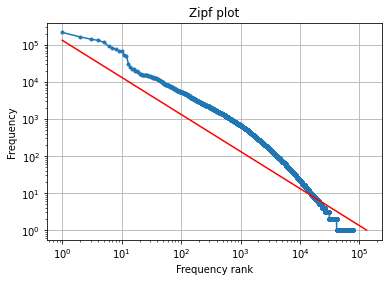

In [ ]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot")
xlabel("Frequency rank")
ylabel("Frequency")
grid(True)



---



In [ ]:
stopwords = stopwords_list()
stopwords += ['.', '،', ':', '/', ')', '(', '%', '//', '[', ']', 'و', 'های', 'ها']

def remove_stopwords(data):
  removed_data = {}
  for i in range(len(data)):
    removed_data[str(i)] = [word for word in data[str(i)] if word not in stopwords]
  return removed_data

removed_data = remove_stopwords(tokenized_data)

Zipf's law again

In [ ]:
from operator import itemgetter    
term_freq = {}
values = removed_data.values()
values_list = list(values)

for i in range(len(removed_data)):
  for word in values_list[i]:
      count = term_freq.get(word,0)
      term_freq[word] = count + 1
     

term_freq_df = pd.DataFrame(term_freq.items(), columns = ['word','total'])
tmp_data = term_freq_df.sort_values(by = ['total'], ascending = False)

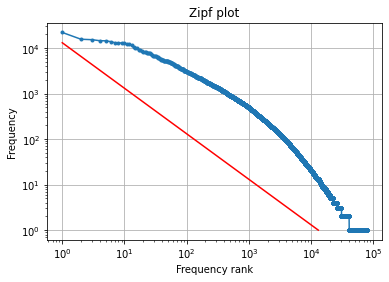

In [ ]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot")
xlabel("Frequency rank")
ylabel("Frequency")
grid(True)

Heap's law

8521.382227788064
10099


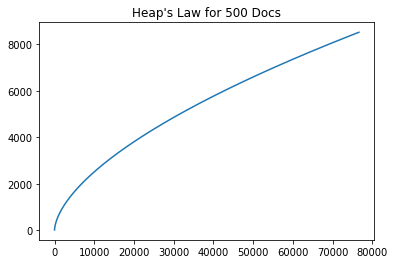

In [ ]:
import math
def show_heaps(data, data_len,k,b):

  v = set()
  n = []
  r = []
  for i in range(data_len):
    for w in data[str(i)]:
        v.add(w)
        n.append(w)
        r.append(k*len(n)**b)
  point = [n for n in range(0, len(r))]


  print(r[len(r)-1])
  print(len(v))
  plt.plot(point, r)
  plt.title("Heap's Law for " + str(data_len) + " Docs")
  plt.show

show_heaps(removed_data,500, 10, 0.6)

13105.7467849278
15088


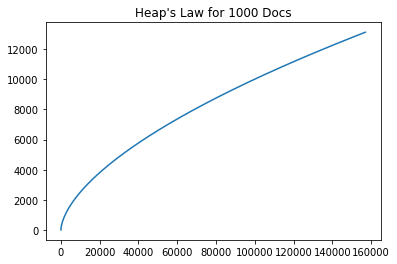

In [ ]:
show_heaps(removed_data,1000, 10, 0.6)

16771.325531377224
18428


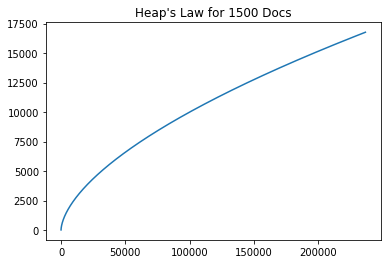

In [ ]:
show_heaps(removed_data,1500, 10, 0.6)

19762.4751252333
21106


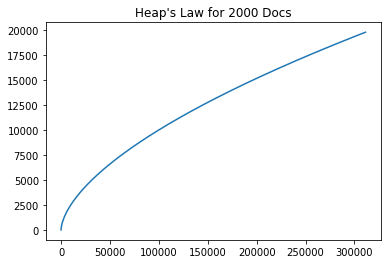

In [ ]:
show_heaps(removed_data,2000, 10, 0.6)

71426.66760440916
78129


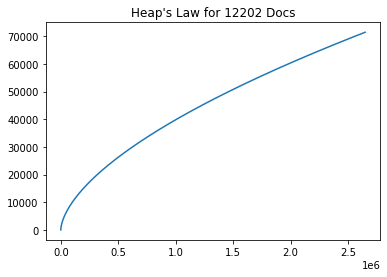

In [ ]:
show_heaps(removed_data,len(removed_data),10,0.6)

Stemmer

In [ ]:
my_stemmer = FindStems()

def stem_words(data):
  stem = {}
  for i in range(len(data)):
    words = []
    for word in data[str(i)]:
      words.append(my_stemmer.convert_to_stem(word))
    stem[str(i)] = words
  return stem

stem_data = stem_words(removed_data)

Heap's law again

6817.105782230451
7864


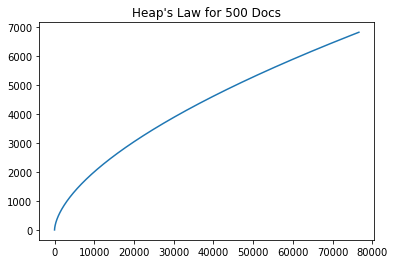

In [ ]:
show_heaps(stem_data,500,8,0.6)

10484.59742794224
11481


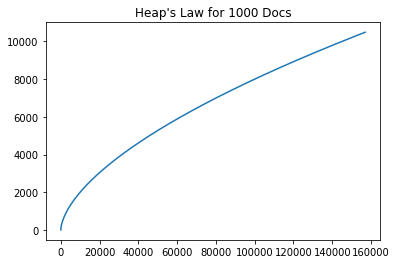

In [ ]:
show_heaps(stem_data,1000,8,0.6)

13417.06042510178
13847


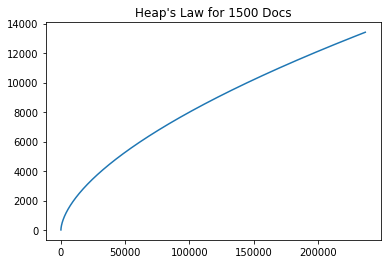

In [ ]:
show_heaps(stem_data,1500,8, 0.6)

15809.980100186642
15833


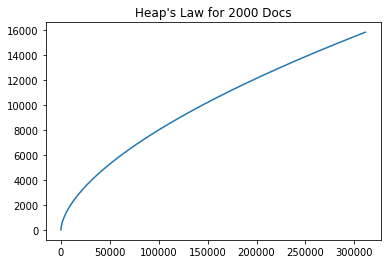

In [ ]:
show_heaps(stem_data,2000,8,0.6)

57141.33408352733
57469


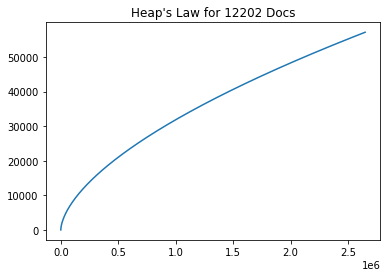

In [ ]:
show_heaps(stem_data,len(stem_data),8,0.6)

Positional Index

In [ ]:
pos_index = {}
doc_id = 0

def positional_index(data):
  for doc_id, content in data.items():
    for pos, term in enumerate(content):
      #check if we have it already
      if term in pos_index:

        if doc_id in pos_index[term][1]:
          pos_index[term][1][doc_id][1].append(pos)
          pos_index[term][1][doc_id][0] += 1
        else:
          pos_index[term][1][doc_id] = []
          pos_index[term][1][doc_id].append(1)
          pos_index[term][1][doc_id].append([pos])
        
        pos_index[term][0] += 1

      else:
        pos_index[term] = []
        pos_index[term].append(1)
        pos_index[term].append({})
        pos_index[term][1][doc_id] = []
        pos_index[term][1][doc_id].append(1)
        pos_index[term][1][doc_id].append([pos])

  return pos_index

pos_in = positional_index(stem_data)
print(len(pos_in))

57469


In [ ]:
print(stopwords)

Query Processing

In [ ]:
import re
import functools
from hazm import *
hazm_normalizer = Normalizer()

def query_proc():
  query = input()

  normal_queries = []
  neg_queries = []
  phrases = []

  query = re.sub("\u200c", " ", query)
  words = query.split(" ")


  for word in re.finditer('"([^"]*)"', query):
    phrases.append(word.group(0))

  for word in re.finditer('[!]\s\w*', query):
    neg_queries.append(word.group(0))
  
  for i in range(len(phrases)):
    phrases[i] = phrases[i].strip('"')

  for i in range(len(neg_queries)):
    neg_queries[i] = neg_queries[i].strip(' !')
  
  for i in range(len(words)):
    words[i] = words[i].strip('"')
  if "!" in words:
    words.remove("!")

  ph_split = []
  if len(phrases) > 0:
    ph_split = phrases[0].split(" ")
  

  normal_queries = [w for w in words if w not in (n for n in neg_queries) and w not in (p for p in ph_split)]
  
  print(normal_queries)
  print(neg_queries)
  print(phrases)

  # preprocess query
  for w in normal_queries:
    w = my_normalizer.normalize(w)
    w = my_tokenizer.tokenize_words(w)
  for i in range(len(normal_queries)):
    normal_queries = [word for word in normal_queries if word not in stopwords]
    
  new_words = []
  for w in normal_queries:  
    new_words.append(my_stemmer.convert_to_stem(w))
  normal_queries = new_words
  print(normal_queries)

   
  ph = []
  if len(phrases) > 0:
    phrases[0] = hazm_normalizer.normalize(phrases[0])
    ph = phrases[0].split(" ")

  rank = {} 
  for i in range(len(data)):
    rank[str(i)] = 0
  
  result = {}
  count = 0

  for q in normal_queries:
    if q in pos_in.keys():
      for k in pos_in[q][1].keys():
        if q in result.keys():
          result[q].add(k)
        else:
          result[q] = set()
          result[q].add(k)
        rank[k] += 1


  count = 0
  ph_result = {}
  for q in ph:
    if q in pos_in.keys():
      count += 1
      for k in pos_in[q][1].keys():
        if q in ph_result.keys():
          ph_result[q].add(k)
        else:
          ph_result[q] = set()
          ph_result[q].add(k)
  
  ph_intersect = set()
  if len(ph_result) > 0:
    # docs that contain all words in the phrase
    ph_intersect = functools.reduce(set.intersection, (set(val) for val in ph_result.values()))


  # docs that contain all words in the specified order
  ph_intersect = list(ph_intersect)
  ph_res = []
  for k in ph_intersect:
    for i in pos_in[ph[0]][1][k][1]:
      for j in pos_in[ph[1]][1][k][1]:
        if j - i == 1:
          print("here " + str(i) + " " + str(j))
          ph_res.append(k)
  
  res = set()
  if len(result) > 0:
    res = functools.reduce(set.union, (set(val) for val in result.values())) 
  if len(res) > 0 and len(ph_res) > 0:
    final_set = res.intersection(ph_res)
  else:
    final_set = res.union(ph_res)
  
  # remove doc_ids for negative queries
  for n in neg_queries:
    for k in pos_in[n][1].keys():
      if k in final_set:
        final_set.remove(k)
  


  #ranking
  ranked = sorted(rank, key=rank.get, reverse=True)
  
  cnt = 0
  for doc in ranked:
    if doc in final_set:
        print(data[doc]['title'])
        print(data[doc]['url'])
        cnt += 1
    if cnt >= 5:
      break
    

query_proc()

پارلمان ترکیه
['پارلمان', 'ترکیه']
[]
[]
['پارلمان', 'ترکیه']
احتمال مبادله نازنین زاغری در ازای 530میلیون دلار
https://www.farsnews.ir/news/14001223001080/احتمال-مبادله-نازنین-زاغری-در-ازای-530میلیون-دلار
رییس جمهور در مسکو/ از تاکید پوتین بر توسعه روابط با ایران تا تشویق رییسی در دومای روسیه
https://www.farsnews.ir/news/14001030000671/رییس-جمهور-در-مسکو-از-تاکید-پوتین-بر-توسعه-روابط-با-ایران-تا-تشویق
روابط و منافع ایران و روسیه مصون از مداخلات عناصر ثالث تنظیم خواهد شد
https://www.farsnews.ir/news/14001030000321/روابط-و-منافع-ایران-و-روسیه-مصون-از-مداخلات-عناصر-ثالث-تنظیم-خواهد-شد
تاکید رئیس‌جمهور در تدوین بودجه ۱۴۰۱ بر عدالت بود/ عزم جدی دولت برای حل مشکلات
https://www.farsnews.ir/news/14000926000004/تاکید-رئیس‌جمهور-در-تدوین-بودجه-۱۴۰۱-بر-عدالت-بود-عزم-جدی-دولت-برای
قالیباف در اجلاس«PUIC»: وحدت و انسجام درمانِ دردهایِ امت اسلامی است/ تشکیل دولت فراگیر و مشارکتی شرط ثبات در افغانستان
https://www.farsnews.ir/news/14000919000403/قالیباف-در-اجلاسPUIC-وحدت-و-انسجام-درمانِ-دردهایِ-امت-اس